Linear Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Экспортируем наши данные

In [2]:
# Importing the dataset
df = pd.read_csv('vehicleprice_prep.csv', sep=',')

In [3]:
df

,brand,model,year,body,car_mileage,fuel,power,transmission,price
0,0.0,0,2006.0,0,220.0,0,2.0,0.0,5350.0
1,1.0,1,2017.0,0,211.0,0,2.3,0.0,17000.0
2,2.0,2,2015.0,0,157.0,0,1.6,0.0,15200.0
3,0.0,0,2000.0,0,300.0,0,2.4,0.0,4999.0
4,3.0,3,2002.0,0,270.0,0,2.5,0.0,12900.0
...,...,...,...,...,...,...,...,...,...
1935,1.0,98,2005.0,10,311.0,0,1.9,0.0,5400.0
1936,10.0,13,2009.0,10,201.0,0,2.0,0.0,8500.0
1937,12.0,157,2012.0,10,199.0,1,1.8,1.0,16500.0
1938,10.0,13,2008.0,10,226.0,2,1.6,0.0,7199.0


Следующий этап нашей работы будет состоять в построении многофакторной линейной регрессии.  Построим корреляционную матрицую Данная матрица необходима для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель.
Как можно определить изначально, большее влияние имеет переменная , Power, потом Year, потом car_mileage, потом transmission.

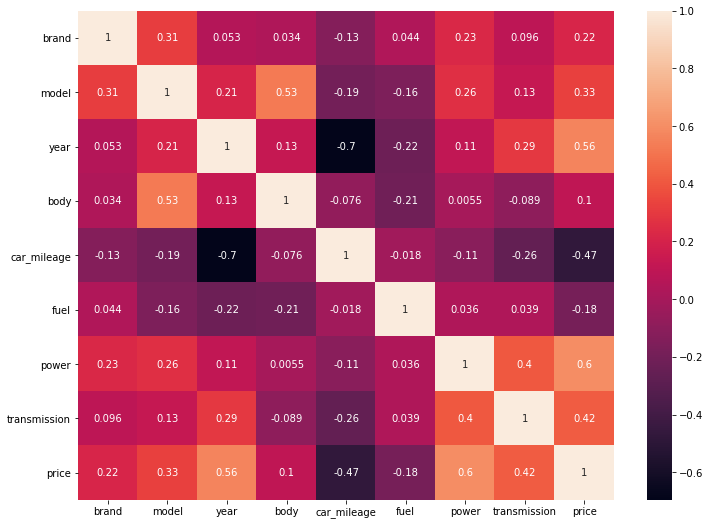

In [4]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Разделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [5]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 8].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Построим модель многофакторной регрессии от всех переменных, включив константу, и выведем статистику по ней.

In [6]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     339.8
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:14:38   Log-Likelihood:                -15976.
No. Observations:                1552   AIC:                         3.197e+04
Df Residuals:                    1543   BIC:                         3.202e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.405e+06   9.47e+04    -14.832      0.000   -1.59e+06   -1.22e+06
x1            46.1898     17.992      2.567      0.010      10.898      81.482
x2             5.7900      2.127      2.722      0.007       1.618       9.962
x3           699.7557     46.954     14.903      0.000     607.656     791.855
x4            24.5486     79.567      0.309      0.758    -131.523     180.620
x5           -20.0716      3.040     -6.602      0.000     -26.035     -14.108
x6         -2158.5566    267.868     -8.058      0.000   -2683.980   -1633.133
x7          6761.4411    241.155     28.038      0.000    6288.416    7234.467
x8          1339.7160    316.035      4.239      0.000     719.813    1959.619
==============================================================================
Omnibus:                      511.499   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1883.360
Skew:                           1.586   Prob(JB):                         0.00
Kurtosis:                       7.366   Cond. No.                     1.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как показала статистика, все переменные модели, кроме Х4 "Boddy" оказались значимыми. Коэффициент детерминации не слишком высокий и равен 0,638, однако модель значимая.

Экспортируем наши измененные данные, где исключена переменная Х4

In [7]:
# Importing the dataset
df = pd.read_csv('vehicleprice_prep1.csv', sep=',')

In [8]:
df

,brand,model,year,car_mileage,fuel,power,transmission,price
0,0.0,0,2006.0,220.0,0,2.0,0.0,5350.0
1,1.0,1,2017.0,211.0,0,2.3,0.0,17000.0
2,2.0,2,2015.0,157.0,0,1.6,0.0,15200.0
3,0.0,0,2000.0,300.0,0,2.4,0.0,4999.0
4,3.0,3,2002.0,270.0,0,2.5,0.0,12900.0
...,...,...,...,...,...,...,...,...
1935,1.0,98,2005.0,311.0,0,1.9,0.0,5400.0
1936,10.0,13,2009.0,201.0,0,2.0,0.0,8500.0
1937,12.0,157,2012.0,199.0,1,1.8,1.0,16500.0
1938,10.0,13,2008.0,226.0,2,1.6,0.0,7199.0


Разделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [9]:
# Splitting the dataset into the Training set and Test set
X1 = df.iloc[:, :-1].values
y1 = df.iloc[:, 7].values
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=10)

Построим модель многофакторной регрессии от всех переменных, включив константу, и выведем статистику по ней.

In [10]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X1 = sm.add_constant(X_train1)
mr1 = sm.OLS(y_train1, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     388.5
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:14:49   Log-Likelihood:                -15976.
No. Observations:                1552   AIC:                         3.197e+04
Df Residuals:                    1544   BIC:                         3.201e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.406e+06   9.46e+04    -14.856      0.000   -1.59e+06   -1.22e+06
x1            45.4479     17.826      2.550      0.011      10.483      80.413
x2             6.1463      1.785      3.443      0.001       2.644       9.648
x3           700.2883     46.908     14.929      0.000     608.278     792.299
x4           -20.0624      3.039     -6.601      0.000     -26.024     -14.101
x5         -2166.2599    266.623     -8.125      0.000   -2689.242   -1643.278
x6          6757.0872    240.671     28.076      0.000    6285.011    7229.164
x7          1324.2625    311.949      4.245      0.000     712.375    1936.151
==============================================================================
Omnibus:                      510.757   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1877.042
Skew:                           1.585   Prob(JB):                         0.00
Kurtosis:                       7.357   Cond. No.                     1.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видим, что исключение незначимой переменной никак нет повлияло на качество модели, попоэтому принимаем решение оставить все переменные. Повторно строим оптимальную модель, выбирая все факторы.

In [11]:
X_train = X_train[:, [0, 1, 2, 3, 4, 5, 6, 7]]
X_test = X_test[:,[0, 1, 2, 3, 4, 5, 6, 7] ]

In [12]:
# Fitting Optimized Multiple Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

Получаем коэффициенты регрессии

In [13]:
# Getting parameters
mr.coef_, mr.intercept_

(array([ 4.61897763e+01,  5.79002097e+00,  6.99755732e+02,  2.45485816e+01,
        -2.00715768e+01, -2.15855657e+03,  6.76144106e+03,  1.33971595e+03]),
 -1404588.6502894547)

Строим прогноз на тестовых значениях:

In [14]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

Вычисляем коэффициент детерминации, видим, что на тестовых значениях он немного выше.

In [15]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.637906548106647, 0.6647477246972698)

Находим среднеквадратическое отклонение, которое на тестовых значениях очень сильно уменьшилась, что говорит о том, что модель  переобучилась.

In [16]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(51124835.49872619, 35570626.75215884)

Строим график по наиболее значимой переменной для визуализации результата (На мой взгляд). Видим, что предсказание работает довольно хорошо.

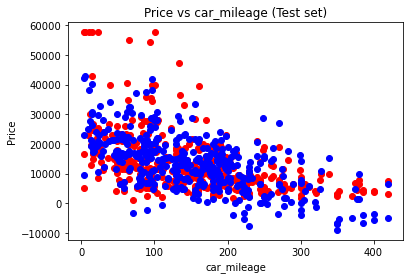

In [17]:
# Visualising the Test set results
plt.scatter(X_test[:,4], y_test, color = 'red')
plt.plot(X_test[:,4], mr.predict(X_test), 'bo')
plt.title('Price vs car_mileage (Test set)')
plt.xlabel('car_mileage')
plt.ylabel('Price')
plt.show()

Итак, мы получили базовую модель, от которой мы будем отталкиваться и ориентирваться в ходе посроения модели нейроной сети.
"Законсервируем" данные, полученные на данном этапе.

In [19]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('vehicleprice_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()